<a href="https://colab.research.google.com/github/ktothep/PythonNotebooks/blob/main/Lending_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas
import matplotlib.pyplot as plt
import numpy
from google.colab import files
import io
import seaborn

In [96]:
uploaded = files.upload()
loan_df = pandas.read_csv(io.BytesIO(uploaded['loan.csv']))
loan_df.head(5)

Saving loan.csv to loan (1).csv


<ipython-input-96-b220f1ed7781>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pandas.read_csv(io.BytesIO(uploaded['loan.csv']))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Getting the shape of the dataframe

In [97]:
loan_df.shape


(39717, 111)

As it can be seen that we have 111 columns.We will now remove the unnecessary columns which are not requried.Getting the list of the columns

In [98]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Cleaning the Dataframe

Checking the columns which have NA values.Some of the columns will have all the columns as NA

In [99]:
loan_df.isna().sum().sort_values(ascending =False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

We have seen from above that there are columns where all the values are NA.So we will drop those columns from the dataset

In [100]:
loan_df.dropna(how='all',axis=1,inplace=True)

Checking the shape of the dataframe again

In [101]:
loan_df.shape

(39717, 57)

Checking columns which have unique values.If some columns have only 1 unique value then those columns will not play any affect on Loan Charge Off

In [102]:
columns=loan_df.nunique()

Columns which have only 1 value in them are:

So we are dropping those columns from the list

In [103]:
single_values_columns=columns[columns.values==1]

In [104]:
single_values_columns.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [105]:
loan_df.drop(list(single_values_columns.index),axis=1,inplace=True)

Checking the shape of the dataframe

In [106]:
loan_df.shape

(39717, 48)

Now we have 48 columns out of which some correspond to the post approval of loan
We are analyzing the user details and the driving factors of loan defaulting before approving loan.So we can safely remove the columns / variables corresponding to that scenario.
Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d".
The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
"desc" has description (text data) which we cannot do anythhing about for now. 
"out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
"funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

List of post-approval features

* delinq_2yrs
* revol_bal
* out_prncp
* 3total_pymnt
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* next_pymnt_d
* chargeoff_within_12_mths
* mths_since_last_delinq
* mths_since_last_record


In [107]:
unwanted_columns = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee","last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record","revol_util"]
loan_df.drop(unwanted_columns,axis=1,inplace=True)            

In [108]:
loan_df_defaulters.shape

(5611, 22)

In [109]:
loan_df_defaulters=loan_df[loan_df['loan_status']=='Charged Off']

Checking the percentage of missing values.If the missing values are less than 5% we will immpute them with mode and if more than 5% we will drop them

In [110]:
(loan_df_defaulters.isna().sum()/len(loan_df_defaulters.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.051893
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.284343
total_acc               0.000000
pub_rec_bankruptcies    2.097032
dtype: float64

In [111]:
loan_df_defaulters['emp_length'].value_counts()

10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: emp_length, dtype: int64

In [124]:
mode_value=loan_df_defaulters['emp_length'].mode()
loan_df_defaulters['emp_length'].fillna(value=mode_value[0],inplace=True)
loan_df_defaulters['emp_length'].isna().sum()

<ipython-input-124-c1590f8f631d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_defaulters['emp_length'].fillna(value=mode_value[0],inplace=True)


0

In [113]:
loan_df_defaulters['emp_length'].value_counts()

10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: emp_length, dtype: int64

In [115]:
mode_value_bankruptcies=loan_df_defaulters['pub_rec_bankruptcies'].mode()
loan_df_defaulters['pub_rec_bankruptcies'].fillna(value=mode_value_bankruptcies[0],inplace=True)
loan_df_defaulters['pub_rec_bankruptcies'].isna().sum()

<ipython-input-115-417c8b0759a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_defaulters['pub_rec_bankruptcies'].fillna(value=mode_value_bankruptcies[0],inplace=True)


0

## Standardise the Data

Checking the information present in each column

In [125]:
loan_df_defaulters.head(5)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
1,2500,2500.0,60.0,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
8,5600,5600.0,60.0,21.28,152.39,F,F2,4,OWN,40000.0,...,Charged Off,small_business,5.55,Apr-04,2,11,0,32.60%,13,0.0
9,5375,5350.0,60.0,12.69,121.45,B,B5,0,RENT,15000.0,...,Charged Off,other,18.08,Sep-04,0,2,0,36.50%,3,0.0
12,9000,9000.0,36.0,13.49,305.38,C,C1,0,RENT,30000.0,...,Charged Off,debt_consolidation,10.08,Apr-04,1,4,0,91.70%,9,0.0
14,10000,10000.0,36.0,10.65,325.74,B,B2,3,RENT,100000.0,...,Charged Off,other,7.06,May-91,2,14,0,55.50%,29,0.0


In [126]:
loan_df_defaulters['emp_length']=loan_df_defaulters['emp_length'].apply(lambda x: 0 if '<' in str(x) else (10 if '+' in str(x) else str(x).split()[0]))

<ipython-input-126-5426e15a2ae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_defaulters['emp_length']=loan_df_defaulters['emp_length'].apply(lambda x: 0 if '<' in str(x) else (10 if '+' in str(x) else str(x).split()[0]))


In [127]:
loan_df_defaulters['int_rate']=loan_df['int_rate'].apply(lambda x:float(str(x)[:-1]))
loan_df_defaulters['int_rate'].head(5)

<ipython-input-127-ce62d18587fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_defaulters['int_rate']=loan_df['int_rate'].apply(lambda x:float(str(x)[:-1]))


1     15.27
8     21.28
9     12.69
12    13.49
14    10.65
Name: int_rate, dtype: float64

In [128]:
loan_df_defaulters['term']=loan_df['term'].apply(lambda x:float(str(x).replace(" months",'')))
loan_df_defaulters['term'].head(5)

<ipython-input-128-e2b0baf86bbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_defaulters['term']=loan_df['term'].apply(lambda x:float(str(x).replace(" months",'')))


1     60.0
8     60.0
9     60.0
12    36.0
14    36.0
Name: term, dtype: float64

# Univaritae Analysis

#Bivariate Analysis

# *Multivariate* Analysis

<ipython-input-130-f8da6fa2ed3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.clustermap(loan_df_defaulters.corr())


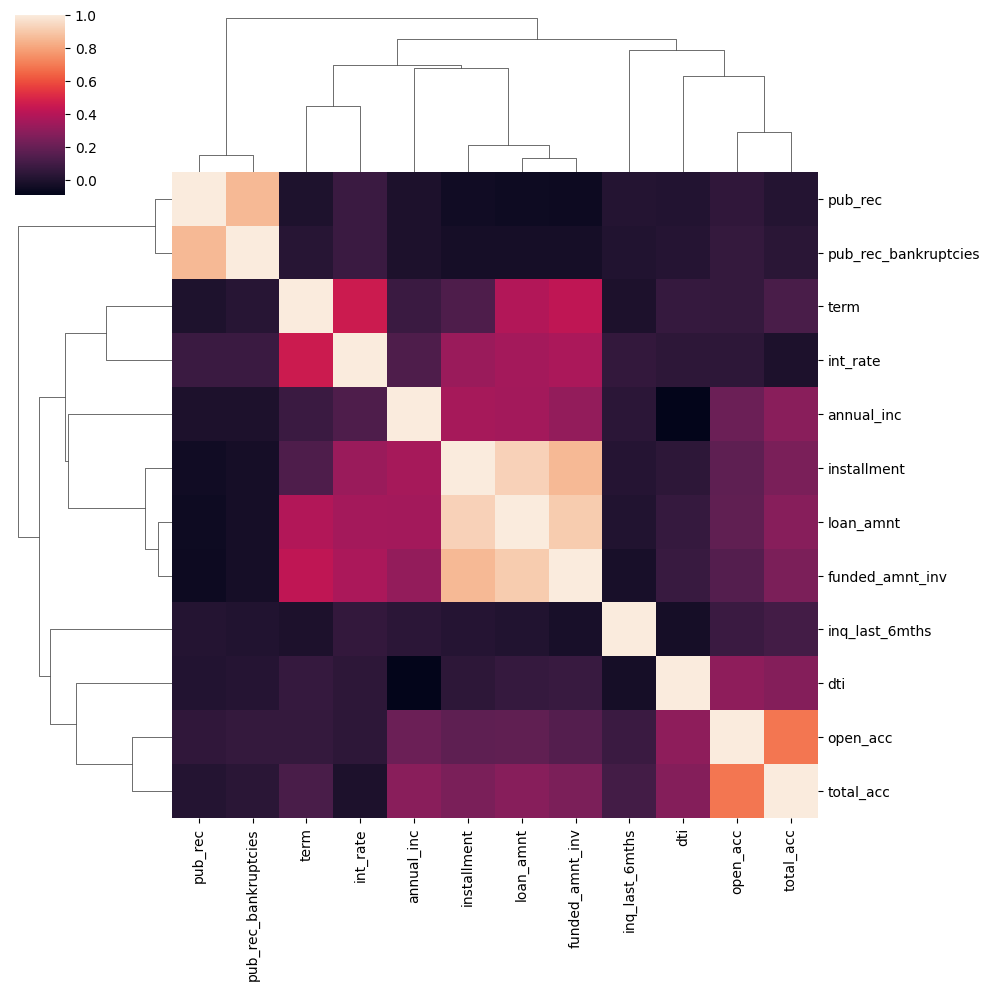

In [130]:
seaborn.clustermap(loan_df_defaulters.corr())

As it can be seen from the above heat map.

1.   There is very high correlation between loan_amnt,funded_amnt,funded_amnt_inv.

2.   There is high correlation between pub_rec_bankruptcies and pub_rec

3.   There is medium correlation between open_acc and total_acc

4.   There is relatively medium correlation between term and int_rate





#Conclusion